In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from utils import parse_constraints

In [3]:
constraints = """
  x <= 2
  x >= 0
  x + y >= 0
  y + 0.5 * x <= 2  
"""
variables = ['x','y']

In [97]:
A, B = parse_constraints(constraints, variables)
A, B = np.array([A[v] for v in variables]), np.array(B)

print(A)
print(B)

[[ 1.  -1.  -1.   0.5]
 [ 0.  -0.  -1.   1. ]]
[ 2. -0. -0.  2.]


## Initial sample

I'm getting the starting point by getting all the vertices of the polytope, 
and then finding their average.

In [139]:
import itertools
vertices = []
# For each square submatrix
for ix in itertools.combinations(range(A.shape[1]), A.shape[0]):
    m = A[:,ix]
    # If invertible
    if np.linalg.det(m) == 0: continue
    # Solve and add the vertex
    vertices.append(B[list(ix)].dot(np.linalg.inv(m)))
    
# Apply full constraints
vertices = np.array(vertices)
ix = (vertices.dot(A) <= B[None,:]).all(axis=1)
vertices = vertices[ix].copy()

# Starting point
point = vertices.mean(axis=0)

# Hit-and-run: 

In [99]:
# Random N-dimensional unit vector
def random_dir(ndim):
    x = np.random.uniform(low=-1,high=1,size=ndim)
    return x / np.linalg.norm(x)

In [128]:
direction = random_dir(A.shape[0])

In [129]:
tsamp = (B - point.dot(A)) / direction.dot(A)
tmin, tmax = tsamp[tsamp < 0].max() , tsamp[tsamp > 0].min()
t = np.array([tmin, tmax])
endpoints = point[:,None]  + t[None,:] * direction[:,None]

### Visualization

In [130]:
XX, YY = np.meshgrid(*[np.linspace(-2,3,201)]*2)
rs = np.array([XX,YY])
rs = np.transpose(rs,axes=(1,2,0)).reshape((-1,2))

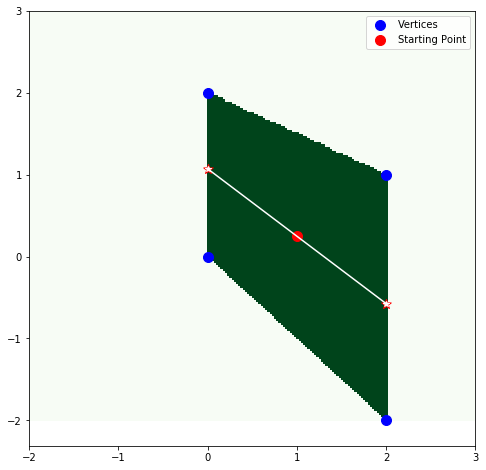

In [136]:
figsize(8,8)
region = (np.dot(A.T,rs.T) <= B[:,None]).all(axis=0).reshape((201,201))
pcolor(XX,YY,region,cmap='Greens')
scatter(*vertices.T, s=100, c='b',label='Vertices')
scatter(*point, s=100, c='r', label='Starting Point')
scatter(*endpoints,marker="*",c="r",s=100)
plot(*endpoints,marker="*",c="w")

legend()

In [150]:
x = point
sample = []
for _ in range(10000):
    direction = random_dir(A.shape[0])
    numer = (B - x.dot(A))
    denom = direction.dot(A)
    
    tsamp = numer[denom != 0] / denom[denom != 0]
    tmin, tmax = tsamp[tsamp < 0].max() , tsamp[tsamp > 0].min()
    
    t = np.random.uniform(low=tmin, high=tmax)
    x = x + t * direction
    sample.append(x)
sample = np.array(sample)

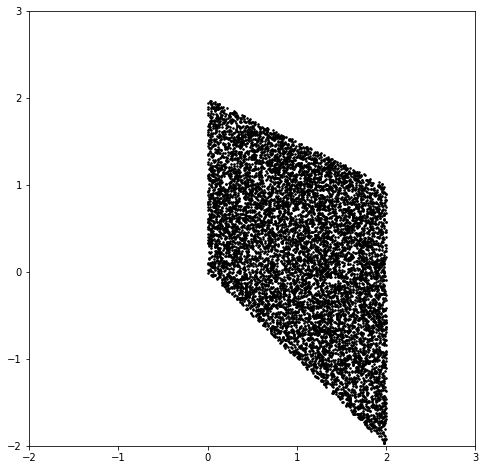

In [152]:
xlim(-2,3)
ylim(-2,3)
scatter(*sample.T, marker='.', c='k',s=10)